# Simple correlation analysis - Indonesia's Forest Cover and its Carbon Emissions
#### created by Nithin G. in the breezy autumn Dutch weather under a tree

World Bank contains data for almost all registered national entities, for various data such as economic, political, household, environmental, etc. Here I have chosen absolutes - such as CO2 emissions in Kilotons, and Forest Area in Square Kilometers. 
Usually, in order to standardize the variables, taking the logarithmic value, or the proportions would be better. But in this case, I argue for its irrelevance. 

So, this simple analysis contains data obtained from World Bank, as a starter (I will look to improve the sources of the dataset in order to contain more features and more time observations as well). 


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [3]:
df = pd.read_excel('C:/Users/nit61/Desktop/indonesia data.xlsx')
df.head()

,Year,CO2 Emissions (kt),Forest Area (sq. km)
0,1960,21404.279,NaN
1,1961,26024.699,NaN
2,1962,22995.757,NaN
3,1963,22783.071,NaN
4,1964,22394.369,NaN


The data for the forest area cover is what I need to improve on, find better sources. 
Global Forest Watch is a really good website to get educated regarding forests and land protection, but their data covers from 2000, and World Bank's covers from 1990. 

In [4]:
df.shape

(57, 3)

In [5]:
df.head(-5)

,Year,CO2 Emissions (kt),Forest Area (sq. km)
0,1960,21404.279,NaN
1,1961,26024.699,NaN
2,1962,22995.757,NaN
3,1963,22783.071,NaN
4,1964,22394.369,NaN
5,1965,24689.911,NaN
6,1966,23395.460,NaN
7,1967,24561.566,NaN
8,1968,27586.841,NaN
9,1969,33391.702,NaN


In [9]:
df[['CO2 Emissions (kt)']] = df[['CO2 Emissions (kt)']]/1000
df[['Forest Area (sq. km)']] = df[['Forest Area (sq. km)']]/1000

In [13]:
df.head(50)

,Year,CO2 Emissions (kt),Forest Area (sq. km)
0,1960,0.021404,NaN
1,1961,0.026025,NaN
2,1962,0.022996,NaN
3,1963,0.022783,NaN
4,1964,0.022394,NaN
5,1965,0.024690,NaN
6,1966,0.023395,NaN
7,1967,0.024562,NaN
8,1968,0.027587,NaN
9,1969,0.033392,NaN


In [21]:
df.rename(columns={'CO2 Emissions (kt)':'Emissions', 'Forest Area (sq. km)':'Forest'}, inplace = True)

In [22]:
df.head()

,Year,Emissions,Forest
0,1960,0.021404,NaN
1,1961,0.026025,NaN
2,1962,0.022996,NaN
3,1963,0.022783,NaN
4,1964,0.022394,NaN


In [44]:
df.set_index('Year', inplace=True)

In [45]:
df.head()

,Emissions,Forest
Year,,
1960,0.021404,NaN
1961,0.026025,NaN
1962,0.022996,NaN
1963,0.022783,NaN
1964,0.022394,NaN


In [46]:
df.corr()

,Emissions,Forest
Emissions,1.000000,-0.875902
Forest,-0.875902,1.000000


High negative correlation between forest coverage and emissions. The unique aspect that needs to be considered for a realistic analysis is, that the emissions ##CAUSED BY## the depleting forest coverage is not observable and recordable, and even if it is, not immediately, but with a time lag.

In [62]:
df.reset_index(inplace=True)
df.head()
df.set_index('Year', inplace=True)
df.head()

,index,Emissions,Forest
Year,,,
1960,0,0.021404,NaN
1961,1,0.026025,NaN
1962,2,0.022996,NaN
1963,3,0.022783,NaN
1964,4,0.022394,NaN


In [63]:
df.drop('index', axis=1, inplace=True)

In [64]:
df.head()

,Emissions,Forest
Year,,
1960,0.021404,NaN
1961,0.026025,NaN
1962,0.022996,NaN
1963,0.022783,NaN
1964,0.022394,NaN


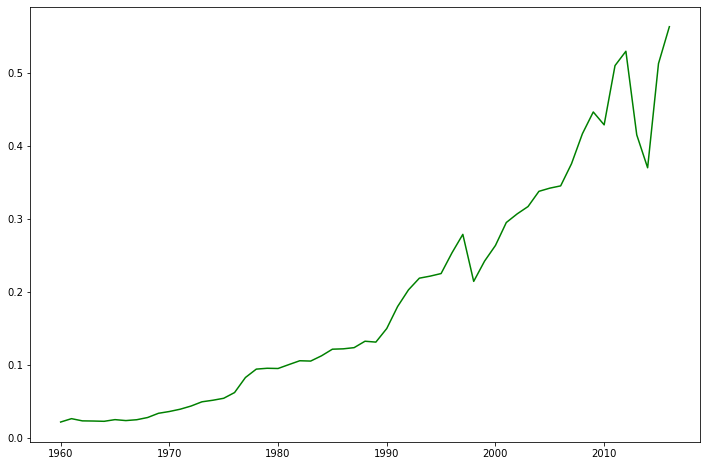

In [76]:
plt.figure(figsize=(12,8))
plt.plot(df['Emissions'], '-g')
plt.show()

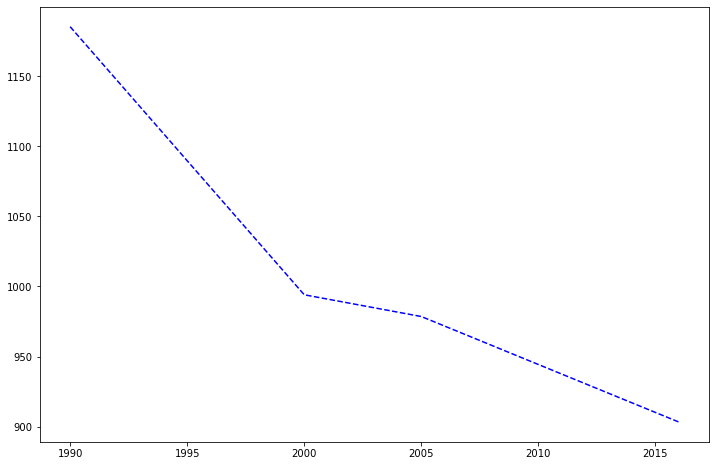

In [77]:
plt.figure(figsize=(12,8))
plt.plot(df['Forest'], '--b')
plt.show()

A small break is seen in the trend during 2000, and one more small break during 2005. It could be explained by the 2000 Earthquake Enggano in Sumatra island. There have been several ASEAN meetings to prevent transboundary forest haze pollution originating in the Indonesian forests. 



### The negative correlation

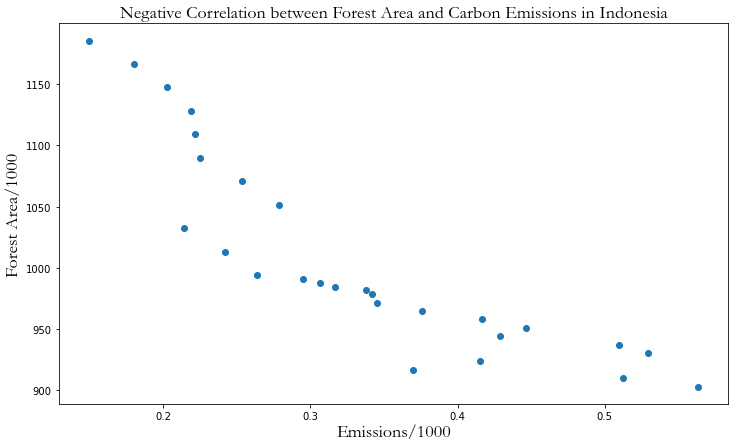

In [91]:
plt.figure(figsize=(12,7))
plt.scatter(df['Emissions'],df['Forest'])
plt.xlabel('Emissions/1000', fontdict={'fontname':'Garamond', 'fontsize':18})
plt.ylabel('Forest Area/1000',fontdict={'fontname':'Garamond', 'fontsize':18})
plt.title('Negative Correlation between Forest Area and Carbon Emissions in Indonesia',
          fontdict={'fontname':'Garamond', 'fontsize':18})
plt.show()

In [92]:
import seaborn as sns
from seaborn import regplot as reg

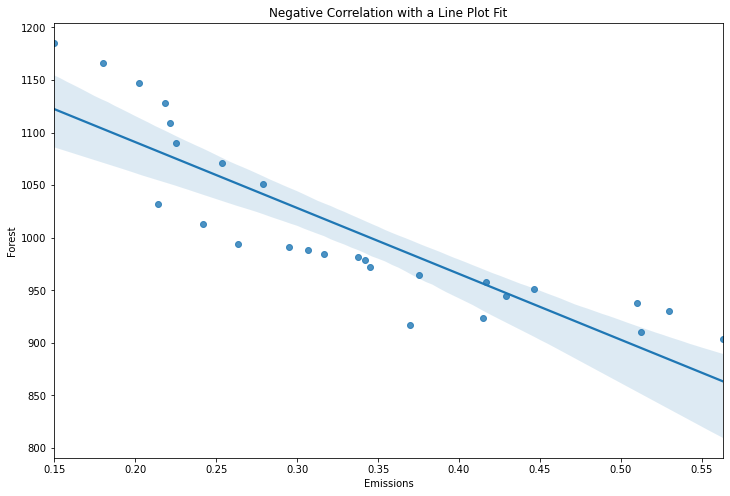

In [95]:
plt.figure(figsize = (12,8))
reg(x = 'Emissions', y = 'Forest', data = df, scatter = True, fit_reg = True)
plt.title('Negative Correlation with a Line Plot Fit')
plt.show()

Although the relationship between carbon emissions and forest area does not necessarily have a linear relationship, it is interesting to see the stark negative correlation with a near perfect fit. 